In [ ]:
from zipfile import ZipFile
filename = 'alzh.zip'
with ZipFile(filename,'r') as Zip:
  Zip.extractall()
  print("done")

done


In [ ]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
TrainingImagePath='/content/archive/Alzheimer_s Dataset/train'
TestingImagePath='/content/archive/Alzheimer_s Dataset/test'
ValidationImagePath='/content/archive/Alzheimer_s Dataset/validation'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255
                                  )

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical',
        )

Found 4562 images belonging to 4 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(229,229),
        batch_size=32,
        class_mode='categorical'
        )

Found 559 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical'
        )

Found 1279 images belonging to 4 classes.


In [ ]:
test_set.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
import zipfile
TrainClasses=training_set.class_indices
ResultMap={0:'MildDemented',1:'ModerateDemented',2:'NonDemented',3:'VeryMildDemented'}
import pickle
with open("/content/Alzheimer_s Dataset.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)
OutputNeurons= len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  4


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
import tensorflow as tf


classifier = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

#last_layer_output = classifier.layers[-1].output
#second_last_layer_output = classifier.layers[-2].output
#third_last_layer_output = classifier.layers[-3].output
#new_model = tf.keras.Model(inputs=classifier.input, outputs=[third_last_layer_output, second_last_layer_output, last_layer_output])
#new_model.summary()
classifier.summary()
classifier.trainable = False

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:

from tensorflow.keras.layers import Input, Convolution2D, Dropout
from tensorflow.keras.models import Model



# First convolutional layer
x = Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu')(classifier.output)
x = Dropout(0.5)(x)

x = Convolution2D(32, kernel_size=(5,5), strides=(1, 1), activation='relu')(classifier.output)
x = Dropout(0.5)(x)

# Second convolutional layer
x = Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(x)
x = Dropout(0.5)(x)

# Third convolutional layer
x = Convolution2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(x)
x = Dropout(0.5)(x)

# Flatten the output
x = Flatten()(x)

# Dense layer after dropout
x = Dense(256, activation='relu')(x)  # Add your desired number of units (e.g., 256)

# Output layer with 4 units for the 4 classes and 'softmax' activation for classification
output_layer = Dense(4, activation='softmax')(x)


# Create the functional model
classifier1 = Model(inputs=classifier.input, outputs=output_layer)

# Compile the model
classifier1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_3. Consider increasing the input size. Received input shape [None, 1, 1, 64] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
model_history = classifier.fit_generator(
    training_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)//32,
    validation_data=validation_set,
    epochs=30,
    verbose=1
)

Epoch 1/20
81/81 [==============================] - 73s 841ms/step - loss: 1.0868 - accuracy: 0.4659
Epoch 2/20
81/81 [==============================] - 69s 845ms/step - loss: 1.0385 - accuracy: 0.4925
Epoch 3/20
81/81 [==============================] - 68s 838ms/step - loss: 0.9791 - accuracy: 0.5237
Epoch 4/20
81/81 [==============================] - 69s 847ms/step - loss: 0.9527 - accuracy: 0.5343
Epoch 5/20
81/81 [==============================] - 68s 840ms/step - loss: 0.9403 - accuracy: 0.5477
Epoch 6/20
81/81 [==============================] - 69s 852ms/step - loss: 0.9174 - accuracy: 0.5653
Epoch 7/20
81/81 [==============================] - 68s 841ms/step - loss: 0.9062 - accuracy: 0.5640
Epoch 8/20
81/81 [==============================] - 69s 854ms/step - loss: 0.8957 - accuracy: 0.5712
Epoch 9/20
81/81 [==============================] - 68s 841ms/step - loss: 0.8970 - accuracy: 0.5622
Epoch 10/20
81/81 [==============================] - 82s 1s/step - loss: 0.8738 - accuracy:

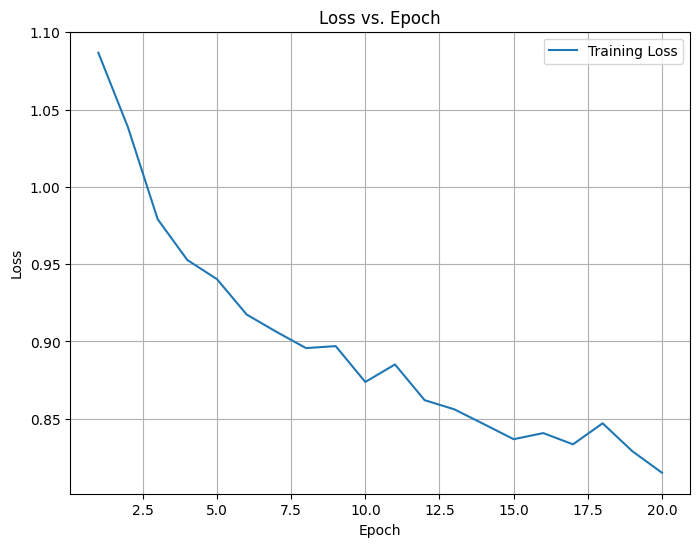

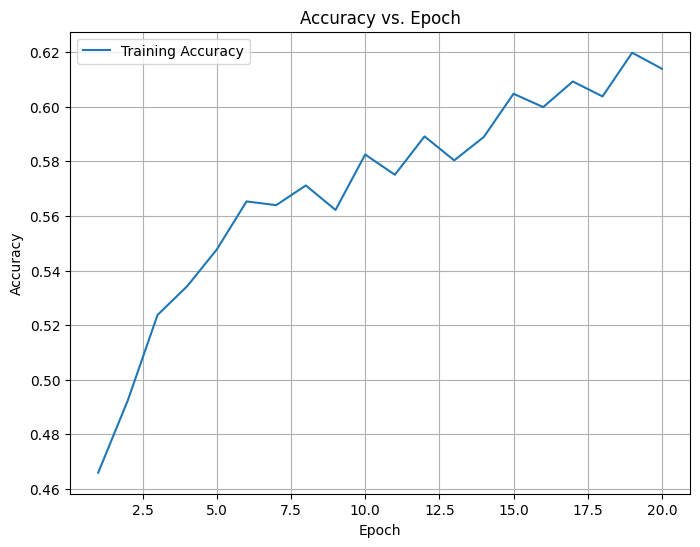

In [ ]:
loss = model_history.history['loss']
accuracy = model_history.history['accuracy']

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(loss) + 1), loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')
plt.grid(True)
plt.show()

Found 1279 images belonging to 4 classes.
40/40 [==============================] - 14s 242ms/step


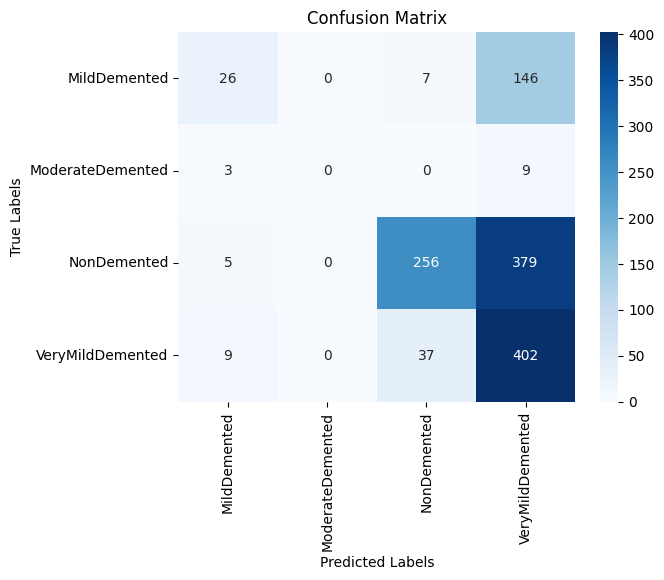

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a test set in a directory with subdirectories for each class
test_directory = '/content/Alzheimer_s Dataset/test'
# Define the ImageDataGenerator for loading and preprocessing test images
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values to [0, 1]

# Load and preprocess the test images
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure the order is maintained for predictions and true labels
)

# Predict the labels for the test set using classifier1
predictions = classifier1.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test set generator
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
class_names = test_generator.class_indices.keys()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.60      0.15      0.23       179
           1       0.00      0.00      0.00        12
           2       0.85      0.40      0.54       640
           3       0.43      0.90      0.58       448

    accuracy                           0.53      1279
   macro avg       0.47      0.36      0.34      1279
weighted avg       0.66      0.53      0.51      1279



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(predictions)

[[3.9441839e-01 3.8981773e-02 1.4025199e-01 4.2634782e-01]
 [6.4851172e-02 1.8318644e-03 5.3852171e-01 3.9479524e-01]
 [2.5819901e-01 1.0087163e-02 2.0082331e-01 5.3089046e-01]
 ...
 [1.1627670e-02 1.5070244e-04 8.2227641e-01 1.6594526e-01]
 [2.2068588e-01 1.2949817e-02 2.7710694e-01 4.8925737e-01]
 [1.2866443e-01 5.6115808e-03 4.2769513e-01 4.3802890e-01]]
